# Методы оптимизаций
## ДЗ 1
### Соколов Игорь
#### Группа 573

## 1. $\text{extr}\left(\left|x_1\right|^\lambda + 2 \left|x_2\right|^\lambda \right)$ при условии $x_1^2 + 4x_2^2 = 4, \;\; \lambda \neq 0$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
from matplotlib import patches
from sympy import *
%matplotlib inline
%matplotlib notebook

Рассмотрим различные случаи:

1) $\lambda \geq 2$

2) $\lambda \in (1,2)$
 
3) $\lambda \in (0,1]$

4) $\lambda < 0$

Рассмотрим семество эллипосов вида $\left|x_1\right|^\lambda + 2 \left|x_2\right|^\lambda= Const$ при разных $\lambda$, но с фикированным Const.

А также допустимое можество, удовлетворяющее уравнению: ${x_1}^{2} + 4{x_2}^{2}= 4$

<IPython.core.display.Javascript object>


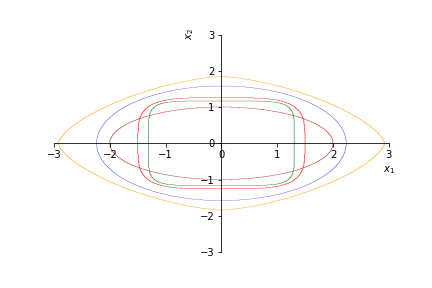

In [7]:
from sympy import plot_implicit, cos, sin, symbols, Eq, And
x1, x2 = symbols('$x_1$ $x_2$')

%matplotlib notebook

hp = plot_implicit(Eq(x1**2 + 2*x2**2, 5),(x1, -3, 3),(x2, -3, 3), show=False, xlabel='$x_1$', ylabel='$x_2$',
                   aspect_ratio={'auto'},line_color='blue')

p1 = plot_implicit(Eq(x1**4 + 2*x2**4, 5), show=False, line_color='red')

p2 = plot_implicit(Eq(x1**6 + 2*x2**6, 5), show=False, line_color='green')

p3 = plot_implicit(Eq(abs(x1)**1.5 + 2*abs(x2)**1.5, 5), show=False, line_color='orange')

budget_set = plot_implicit(Eq(x1**2 + 4*x2**2, 4), show=False, line_color='firebrick')

hp.extend(p1)
hp.extend(p2)
hp.extend(budget_set)
hp.extend(p3)

hp.show()

In [42]:
def draw_family(l, const, color, x_min, x_max, y_min, y_max):
    p = plot_implicit(Eq(abs(x1)**l[0] + 2*abs(x2)**l[0], const),(x1, x_min, x_max),(x2, y_min, y_max), show=False, xlabel='$x_1$', ylabel='$x_2$',
                   aspect_ratio={'auto'},line_color=color[0])
    
    for i in range(1,len(l)):
        p1 = plot_implicit(Eq(abs(x1)**l[i] + 2*abs(x2)**l[i], const), show=False, line_color=color[i])
        p.extend(p1)
    p.show()  
    fig = hp._backend.fig
    ax = hp._backend.ax

    ax.set_aspect('equal','datalim')

    fig.canvas.draw()

In [38]:
def draw_levels(l, const, color, x_min, x_max, y_min, y_max):
    p = plot_implicit(Eq(abs(x1)**l + 2*abs(x2)**l, const[0]),(x1, x_min, x_max),(x2, y_min, y_max), show=False, xlabel='$x_1$', ylabel='$x_2$',
                   aspect_ratio={'auto'},line_color=color[0])
    for i in range(1,len(const)):
        p1 = plot_implicit(Eq(abs(x1)**l + 2*abs(x2)**l, const[i]), show=False, line_color=color[i])
        p.extend(p1)
    p.show()  
    fig = hp._backend.fig
    ax = hp._backend.ax

    ax.set_aspect('equal','datalim')

    fig.canvas.draw()

К графику выше:

${|x_1|}^{1.5} + 2{|x_2|}^{1.5}= 5$ (orange)

${|x_1|}^{2} + 2{|x_2|}^{2}= 5$ (blue)

${|x_1|}^{4} + 2{|x_2|}^{4}= 5$ (red)

${|x_1|}^{6} + 2{|x_2|}^{6}= 5$ (green)

$x1^2 + 4x_2^2= 4$ (firebrick) (допустимое множество)

Заметим что при увеличении $\lambda$ ($Const$ фиксирован) заметно сужение вдоль осей $x_1$ и $x_2$ и эллипс становится менее закругленной.

При $\lambda \geq 2$ допустимое множество сильнее вытянуто вдоль оси $x_1$ (в силу своего уравнения) по сравнению с графиком $Const$-уровня целевой функции (отображено на графике ниже)

При $\lambda \geq 0$, при увеличении $Const$ в правой части, $Const$-уровень целевой функции отдоляется от начала координат (график целевой функции имеет форму чаши).

Допустимое множество и $Const$-уровни целевой функции симметричны относительно осей $x_1$ и $x_2$


<IPython.core.display.Javascript object>


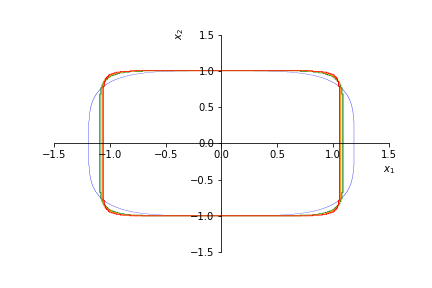

In [34]:
draw_family([4, 8, 10, 12],2,['blue', 'green', 'orange','red'],-1.5, 1.5,-1.5, 1.5)

К графику выше ($\lambda$-уровни целевой функции при $Const=5$):

${|x_1|}^{4} + 2{|x_2|}^{2}= 5$ (blue)

${|x_1|}^{8} + 2{|x_2|}^{8}= 5$ (green)

${|x_1|}^{10} + 2{|x_2|}^{10}= 5$ (orange)

${|x_1|}^{12} + 2{|x_2|}^{12}= 5$ (red)


<IPython.core.display.Javascript object>


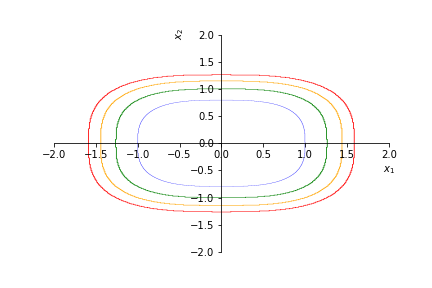

In [40]:
draw_levels(3,[1, 2, 3, 4],['blue', 'green', 'orange','red'],-2, 2,-2, 2)

К графику выше (Const-уровни целевой функции при $\lambda=3$):

${|x_1|}^{3} + 2{|x_2|}^{3}= 1$ (blue)

${|x_1|}^{3} + 2{|x_2|}^{3}= 2$ (green)

${|x_1|}^{3} + 2{|x_2|}^{3}= 3$ (orange)

${|x_1|}^{3} + 2{|x_2|}^{3}= 4$ (red)



В силу всего выше написанного, минимум задачи поиcка экстремума будет в точках касания, изображенных на графике ниже

In [58]:
def draw_solution(l, const, x_min, x_max, y_min, y_max, point):
    hp = plot_implicit(Eq(abs(x1)**l + 2*abs(x2)**l, const),(x1, x_min, x_max),(x2, y_min, y_max), show=False, xlabel='$x_1$', ylabel='$x_2$',
                   aspect_ratio={'auto'},line_color='blue')

    budget_set = plot_implicit(Eq(x1**2 + 4*x2**2, 4), show=False, line_color='firebrick')

    hp.extend(budget_set)
    hp.show()

    fig = hp._backend.fig
    ax = hp._backend.ax
    for i in range (len(point)):
        ax.plot(point[i][0],point[i][1],'o', color='red')
    
    ax.set_aspect('equal','datalim')
    fig.canvas.draw()

In [51]:
def draw_solution2(l1, const1, l2, const2, x_min, x_max, y_min, y_max, point):
    hp = plot_implicit(Eq(abs(x1)**l1 + 2*abs(x2)**l1, const1),(x1, x_min, x_max),(x2, y_min, y_max), show=False, xlabel='$x_1$', ylabel='$x_2$',
                   aspect_ratio={'auto'},line_color='blue')
    
    hpp = plot_implicit(Eq(abs(x1)**l2 + 2*abs(x2)**l2, const2),show=False, ,line_color='blue')
    
    hp.extend(hpp)
    budget_set = plot_implicit(Eq(x1**2 + 4*x2**2, 4), show=False, line_color='firebrick')

    hp.extend(budget_set)
    hp.show()

    fig = hp._backend.fig
    ax = hp._backend.ax
    for i in range (len(point)):
        ax.plot(point[i][0],point[i][1],'o', color='red')
    
    ax.set_aspect('equal','datalim')
    fig.canvas.draw()

### 1) $\lambda \geq 2$

<IPython.core.display.Javascript object>


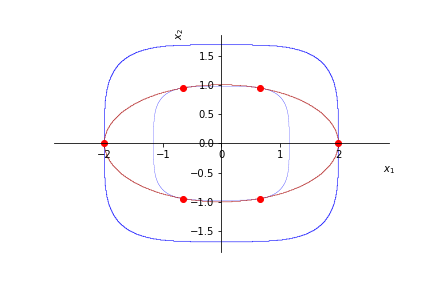

In [52]:
draw_solution2(4,1.8, 4, 16, -2, 2, -2, 2, [[0.663863,0.948738],[-0.663863,0.948738],[0.663863,-0.948738],[-0.663863,-0.948738],[-2,0],[2,0]])

${|x_1|}^{4} + 2{|x_2|}^{4}= 1.8$ 

${|x_1|}^{4} + 2{|x_2|}^{4}= 16$ 

Аналитически эти точки находтся из системы(вначале найдем на $\mathbb{R}^2_+$, затем из соображений симметрии найдем и другие):

$$\begin{cases}
{x_1}^{2} + 4{x_2}^{2}= 4\\ 
{x_1}^{\lambda} + 2{x_2}^{\lambda}= Const\\
\end{cases}
$$

Условие касания(равенсво точек и равенство производных в точке касания):

$$ \begin{cases}
x_2 = \sqrt{1 - \frac{x_1^2}{4}}\\ 
x_2 = \left(Const - \frac{x_1^{\lambda}}{2}\right)^{\frac{1}{\lambda}}\\
\frac{dx_2}{dx_1} = -\frac{x_1}{4\sqrt{1 - \frac{x_1^2}{4}}}\\ 
\frac{dx_2}{dx_1} = \frac{x_1^{\lambda-1}}{2}\left(\frac{Const}{2} - \frac{x_1^{\lambda}}{2}\right)\\
\end{cases}
$$

Данная система имеет решения для каждого $\lambda$. Решением будет тройка $(x_1,x_2, Const)$, причем
$x_1,x_2\in\mathbb{R}^2_+$

Тогда все точки минимума из соображений симметрии будут иметь вид $(x_1, x_2), (-x_1, x_2), (x_1, -x_2), (-x_1, -x_2)$

Однако,заметим, что данную задачу можно свести к задаче безусловной оптимизации, оспользуя метод множителей Лагранжа, так как имеет место огрничение типа равенство. Аналогичино рассмотрим решение на $\mathbb{R}^2_+$, а потом отобразим из соображений симметрии

$$L(x_1,x_2)=f(x_1,x_2) + lg(x_1,x_2)$$
где 

$f(x_1,x_2)=x_1^{\lambda}+2x_2^{\lambda} $

$g(x_1,x_2)={x_1}^{2} + 4{x_2}^{2} - 4$
$$ \begin{cases}
\frac{\partial L}{\partial x_1} = 0  \\
\frac{\partial L}{\partial x_2} = 0  \\ 
\frac{\partial L}{\partial l} = 0  \\ 
\end{cases}
$$

$$ (*)\begin{cases}
\frac{\partial L}{\partial x_1} = \lambda x_1^{\lambda - 1}  + 2lx_1  \\
\frac{\partial L}{\partial x_2} = 2\lambda x_2^{\lambda-1} +8l x_2 \\ 
\frac{\partial L}{\partial l} ={x_1}^{2} + 4{x_2}^{2} - 4  \\ 
\end{cases}
$$

При каждом конкретном $\lambda$ система будет иметь решение. 

Точки макимума будут в (-2,0), (2,0).

### 2.1) $\lambda = 2$

А данном случае точки min в $(0,1), (0,-1)$, max в $(2,0), (-2,0)$.

<IPython.core.display.Javascript object>


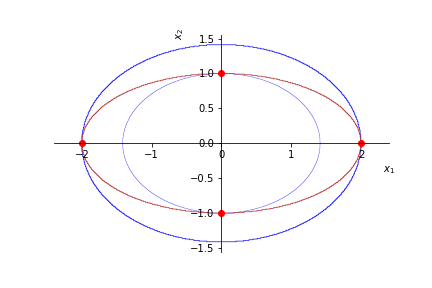

In [53]:
draw_solution2(2,2,2,4,-2,2,-2,2,[[0,1],[0,-1], [-2,0],[2,0]])

${|x_1|}^{2} + 2{|x_2|}^{2}= 2$ 

${|x_1|}^{2} + 2{|x_2|}^{2}= 4$ 

### 2) $\lambda \in [1,2)$

Семейство $Const$-уровней целевой функции при уменьшении $\lambda$ стремиться к форме ромба.

Точки минимума в $(0,1), (0,-1)$


<IPython.core.display.Javascript object>


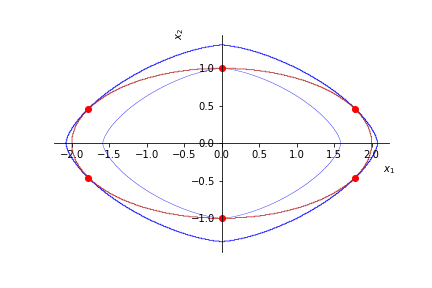

In [54]:
draw_solution2(1.5,2,1.5,3,-2,2,-2,2,[[0,1],[0,-1],[1.77987,0.459022],[-1.77987,0.459022],[1.77987,-0.459022],[-1.77987,-0.459022]])

${|x_1|}^{1.5} + 2{|x_2|}^{1.5}= 2$ 

${|x_1|}^{1.5} + 2{|x_2|}^{1.5}= 3$ 

Точки максимума находится аналогично из системы $(*).$

### 3) $\lambda \in (0,1]$

Изобразим семество $\lambda$-уровней функции $f(x,y) = {|x_1|}^{\lambda} + 2{|x_2|}^{\lambda}$ при фиксированном $Const$

<IPython.core.display.Javascript object>


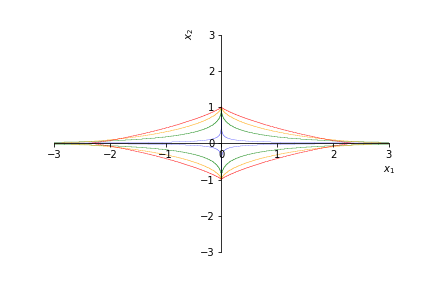

In [43]:
draw_family([0.2, 0.4, 0.6, 0.8],2,['blue', 'green', 'orange','red'],-3, 3,-3, 3)

Сильнее вытынуты вдоль $x_1$.

$\Rightarrow$ минимум будет в точках (-2,0), (2,0)

<IPython.core.display.Javascript object>


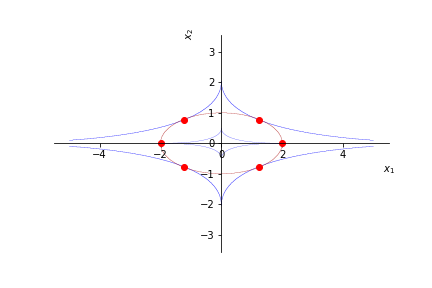

In [55]:
draw_solution2(0.5,sqrt(2), 0.5,2*sqrt(2.05),-3, 3,-3, 3,[[2,0],[-2,0], [1.2367,0.774689],[-1.2367,0.774689],[1.2367,-0.774689],[-1.2367,-0.774689]])

${|x_1|}^{0.5} + 2{|x_2|}^{0.5}= \sqrt{2}$ 

${|x_1|}^{0.5} + 2{|x_2|}^{0.5}= 2\sqrt{2.05}$ 

А точки могут быть найдены из $(*)$

### 4) $\lambda < 0$

Изобразим семество $\lambda$-уровней функции $f(x,y) = \frac{1}{|x_1|^{\lambda}} + \frac{2}{|x_2|^{\lambda}}$ при фиксированном $Const$

<IPython.core.display.Javascript object>


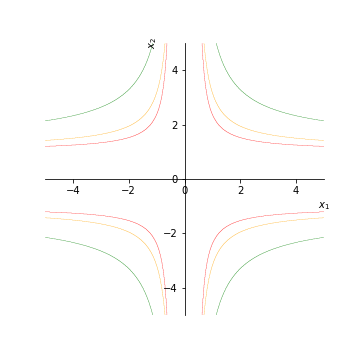

In [307]:
#la in (0,1)
color = ['blue', 'green', 'orange','red']

n = len(color)
la = [-0.3, -0.4, -0.6, -0.8]

p = plot_implicit(Eq(abs(x1)**la[0] + 2*abs(x2)**la[0], 0.8),(x1, -5, 5),(x2, -5, 5), show=False, xlabel='$x_1$', ylabel='$x_2$',
                   aspect_ratio={'auto'},line_color=color[0])
for i in range(1,n):
    p1 = plot_implicit(Eq(abs(x1)**la[i] + 2*abs(x2)**la[i], 2), show=False, line_color=color[i])
    p.extend(p1)
    
hp.extend(budget_set)
p.show()
fig = hp._backend.fig
ax = hp._backend.ax
#p.show()
fig.canvas.draw()

Изобразим семейство $Const$-уровней

<IPython.core.display.Javascript object>


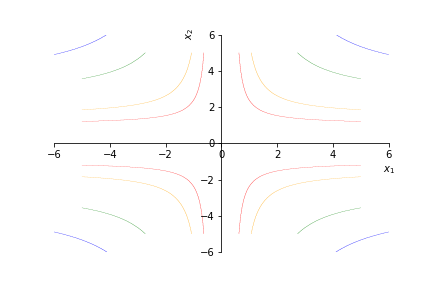

In [49]:
draw_levels(-0.8, [0.8,1,1.5,2],['blue', 'green', 'orange','red']
, -6, 6,-6, 6)

При $\lambda < 0$, при увеличении $Const$ в правой части, $Const$-уровень целевой функции будет приближаться к началу координат.

Допустимое множество и $Const$-уровни целевой функции симметричны относительно осей $x_1$ и $x_2$

<IPython.core.display.Javascript object>


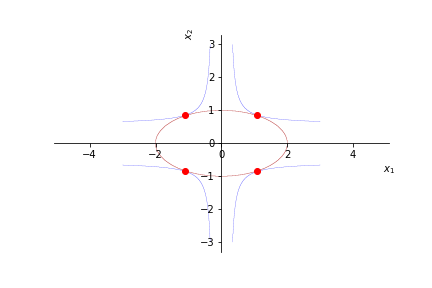

In [45]:
draw_solution(-0.8,3.2,-3, 3,-3, 3,[[1.09125,0.846254],[-1.09125,0.846254],[1.09125,-0.846254],[-1.09125,-0.846254]])

${|x_1|}^{-0.8} + 2{|x_2|}^{-0.8}= 3.2$ 

При $\lambda<0$ $\exists$ только одна точка экстремума - точка минимума. 

Конечного максимума в этой задаче нет.

Доказательство:

Пусть $Const_{min}$ есть $Const$ при котором задача имеет минимум для фиксированного $\lambda_0$

Тогда $\forall Const>Const_{min} \rightarrow \exists(x_1^0,x_2^0) \in\left\{(x_1, x_2)\big| x_1^2 + 4x_2^2= 4\right\}\cap \left\{(x_1, x_2)\big| \left|x_1\right|^{\lambda_0} + 2 \left|x_2\right|^{\lambda_0} = Const\right\} = U$

Доказано

## Ответ:
1) При $\lambda \geq 2$: $min = \{из (*)\}, max = \{(-2,0), (2,0)\}$

2) При $\lambda \in (1,2)$: $min = \{(0,1),(0,-1)\}, max \{из (*)\}$
 
3) При $\lambda \in (0,1]$:$min = \{(-2,0), (2,0)\}, max = \{из (*)\}$

4) При $\lambda < 0$: $min = \{из (*)\}, max =+\infty $

## 2. $ \text{extr}\left(x_1^2 + 4x_2^2\right)$ при условии $\left|x_1\right|^\lambda + 2 \left|x_2\right|^\lambda \le 1, \;\; \lambda \neq 0$

Аналогичено задаче 1:

1) $\lambda \geq 2$

2) $\lambda \in (1,2)$
 
3) $\lambda \in (0,1]$

4) $\lambda < 0$

In [65]:
def draw_solution_2(l, const, x_min, x_max, y_min, y_max, point):
    hp = plot_implicit(Eq(x1**2 + 4*x2**2, const),(x1, x_min, x_max),(x2, y_min, y_max), show=False, xlabel='$x_1$', ylabel='$x_2$',
                   aspect_ratio={'auto'},line_color='blue')

    budget_set = plot_implicit(abs(x1)**l + 2*abs(x2)**l<=1, show=False, line_color='firebrick')

    hp.extend(budget_set)
    hp.show()

    fig = hp._backend.fig
    ax = hp._backend.ax
    for i in range (len(point)):
        ax.plot(point[i][0],point[i][1],'o', color='red')
    
    ax.set_aspect('equal','datalim')
    fig.canvas.draw()

### 1) $\lambda \geq 2$

<IPython.core.display.Javascript object>


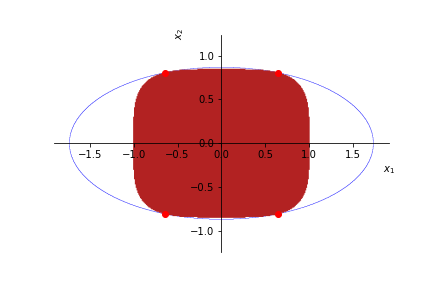

In [70]:
draw_solution_2(4,3, -2, 2, -2, 2, [[0.643984,0.801852],[-0.643984,0.801852],[0.643984,-0.801852],[-0.643984,-0.801852]])

$\lambda = 4, C =3 $

Из графика видно, что минимум в $(0,0)$.

Точка максимума имеет место на границе допустимого множества.

Решаем на полодиельном октанте, остальные точки максимума находим из соображений симметрии графика

Составляем функцию Лагранжа.

$$L(x_1,x_2)=f(x_1,x_2) + lg(x_1,x_2)$$
где 

$f(x_1,x_2)= {x_1}^{2} + 4{x_2}^{2} - 4$

$g(x_1,x_2)=x_1^{\lambda}+2x_2^{\lambda}-1 $

$$ \begin{cases}
\frac{\partial L}{\partial x_1} = 0  \\
\frac{\partial L}{\partial x_2} = 0  \\ 
\frac{\partial L}{\partial l} = 0  \\ 
\end{cases}
$$

$$ (**)\begin{cases}
\frac{\partial L}{\partial x_1} = 2x_1 + \lambda l x_1^{\lambda - 1}  \\
\frac{\partial L}{\partial x_2} = 8x_2 + 2\lambda l  x_2^{\lambda-1}\\ 
\frac{\partial L}{\partial l} =x_1^{\lambda}+2x_2^{\lambda}-1  \\ 
\end{cases}
$$

### 2) $\lambda \in [1,2)$

<IPython.core.display.Javascript object>


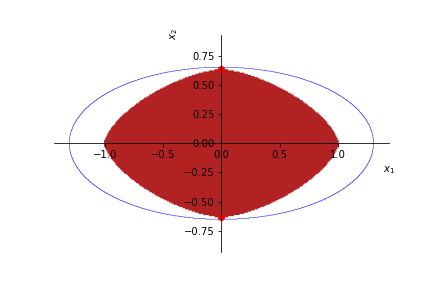

In [79]:
draw_solution_2(1.5,1.7, -2, 2, -2, 2, [[0,0.633309],[0,-0.633309]])

$\lambda = 1.5, C =1.7 $

Минимум снова в (0,0).

Максимум из $(***)$ с учетом $x_1 = 0$

$\Rightarrow max = \left\{ \left(0,\left(\frac{1}{2}\right)^{\frac{1}{\lambda}} \right), \left(0,-\left(\frac{1}{2}\right)^{\frac{1}{\lambda}} \right) \right\}$

### 3) $\lambda \in (0,1)$

<IPython.core.display.Javascript object>


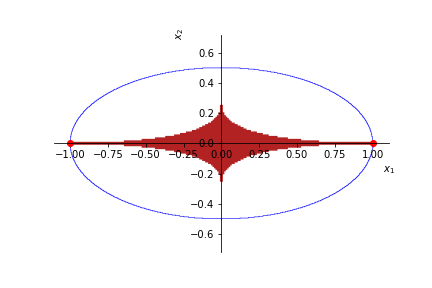

In [81]:
draw_solution_2(0.5,1, -2, 2, -2, 2, [[-1,0],[1,0]])

$\lambda = 0.5, C =1 $

Минимум в (0,0).

Максимум из $(***)$ с учетом $x_2 = 0$

$\Rightarrow max =\left\{  \left(1,0 \right), \left(-1,0 \right)\right\} $

### 4) $\lambda < 0$

<IPython.core.display.Javascript object>


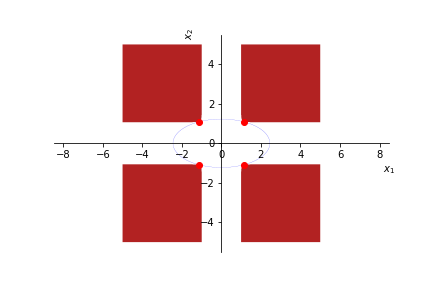

In [92]:
draw_solution_2(-10, 6, -3, 3, -3, 3, [[1.14528,1.09665],[-1.14528,1.09665],[1.14528,-1.09665],[-1.14528,-1.09665]])

$\lambda = -10, C = 6 $

Минимум находим из $(**)$ .

Конечного максимума нет.

## Ответ:
1) При $\lambda \geq 2$: $min = (0,0),max \{из (**)\$

2) При $\lambda \in (1,2)$: $min = (0,0), max = \left\{ \left(0,\left(\frac{1}{2}\right)^{\frac{1}{\lambda}} \right), \left(0,-\left(\frac{1}{2}\right)^{\frac{1}{\lambda}} \right) \right\}$
 
3) При $\lambda \in (0,1]$:$min = (0,0), max = \left\{  \left(1,0 \right), \left(-1,0 \right)\right\}$

4) При $\lambda < 0$: $min = \{из (**)\}, max =+\infty $

## 3. $\text{extr}\left(x_1^2 + 4x_2^2\right)$ при условии $\left|x_1\right|^\lambda + 2 \left|x_2\right|^\lambda = 1, \;\; \lambda \neq 0$

Аналогично задаче 2 только решение ищется на границе.

In [98]:
def draw_solution_22(l, const1, const2, x_min, x_max, y_min, y_max, point):
    hp = plot_implicit(Eq(x1**2 + 4*x2**2, const1),(x1, x_min, x_max),(x2, y_min, y_max), show=False, xlabel='$x_1$', ylabel='$x_2$',
                   aspect_ratio={'auto'},line_color='blue')
    hpp  = plot_implicit(Eq(x1**2 + 4*x2**2, const2), show=False, line_color='blue')
    
    hp.extend(hpp)
    budget_set = plot_implicit(Eq(abs(x1)**l + 2*abs(x2)**l,1), show=False, line_color='firebrick')

    hp.extend(budget_set)
    hp.show()

    fig = hp._backend.fig
    ax = hp._backend.ax
    for i in range (len(point)):
        ax.plot(point[i][0],point[i][1],'o', color='red')
    
    ax.set_aspect('equal','datalim')
    fig.canvas.draw()

Аналогичено задаче 1:

1) $\lambda \geq 2$

2) $\lambda \in (1,2)$
 
3) $\lambda \in (0,1]$

4) $\lambda < 0$

### 1) $\lambda \geq 2$

<IPython.core.display.Javascript object>


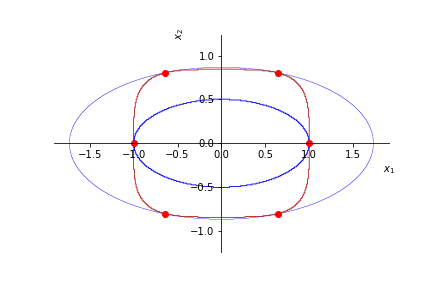

In [100]:
draw_solution_22(4,3,1, -2, 2, -2, 2, [[0.643984,0.801852],[-0.643984,0.801852],[0.643984,-0.801852],[-0.643984,-0.801852],[1,0],[-1,0]])

$\lambda = 4, C_1 = 1, С_2=3  $

$max:$ из системы $(**)$

$min: \left\{  \left(1,0 \right), \left(-1,0 \right)\right\}$ (из системы $(**)$ с учетом $x_2=0$)

### 2) $\lambda \in [1,2)$

<IPython.core.display.Javascript object>


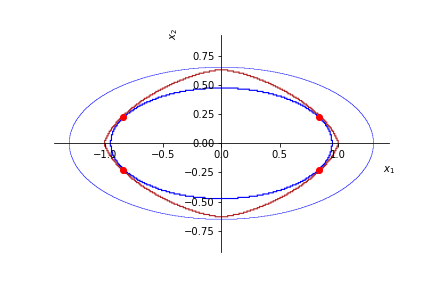

In [104]:
draw_solution_22(1.5,1.7,0.9, -2, 2, -2, 2, [[0.839502,0.228342],[-0.839502,0.228342],[0.839502,-0.228342],[-0.839502,-0.228342]])

### 3) $\lambda \in (0,1)$

In [ ]:
draw_solution_2(0.5,1, -2, 2, -2, 2, [[-1,0],[1,0]])

### 4) $\lambda < 0$

## Ответ:
1) При $\lambda \geq 2$: $min = \left\{  \left(1,0 \right), \left(-1,0 \right)\right\,max \{из (**)\$

2) При $\lambda \in (1,2)$: $min = (0,0), max = \left\{ \left(0,\left(\frac{1}{2}\right)^{\frac{1}{\lambda}} \right), \left(0,-\left(\frac{1}{2}\right)^{\frac{1}{\lambda}} \right) \right\}$
 
3) При $\lambda \in (0,1]$:$min = (0,0), max = \left\{  \left(1,0 \right), \left(-1,0 \right)\right\}$

4) При $\lambda < 0$: $min = \{из (**)\}, max =+\infty $